### Decision Tree Regressor implementation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### California Housing Pricing Dataset

In [2]:
from sklearn.datasets import fetch_california_housing
california_df=fetch_california_housing()

In [3]:
california_df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [4]:
df=pd.DataFrame(california_df.data,columns=california_df.feature_names)
df['Target']=california_df.target  # total dataset contain 20640 around data, we will only take around 25% of the data 

In [5]:
df.shape

(20640, 9)

In [6]:
## taking sample data 
df=df.sample(frac=0.25)  # we will not take entire because hyperparameter tunning will take alot of time

In [7]:
df.shape

(5160, 9)

In [8]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
5929,4.8125,16.0,5.439462,0.955157,1319.0,2.957399,34.12,-117.79,2.245
9984,4.6500,43.0,7.126280,1.293515,721.0,2.460751,38.56,-122.59,2.450
11446,6.9790,17.0,6.705706,0.960961,2166.0,3.252252,33.67,-117.97,3.307
629,3.3710,42.0,4.530120,0.992470,1817.0,2.736446,37.72,-122.17,1.650
19079,3.2727,17.0,5.234177,1.139241,1587.0,2.511076,38.32,-122.49,1.760


In [9]:
# independent feature 
x=df.iloc[:,:-1]
# dependent feature 
y=df.iloc[:,-1]

In [10]:
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
5929,4.8125,16.0,5.439462,0.955157,1319.0,2.957399,34.12,-117.79
9984,4.6500,43.0,7.126280,1.293515,721.0,2.460751,38.56,-122.59
11446,6.9790,17.0,6.705706,0.960961,2166.0,3.252252,33.67,-117.97
629,3.3710,42.0,4.530120,0.992470,1817.0,2.736446,37.72,-122.17
19079,3.2727,17.0,5.234177,1.139241,1587.0,2.511076,38.32,-122.49


In [11]:
# train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [12]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()

In [13]:
regressor.fit(x_train,y_train)

DecisionTreeRegressor()

In [14]:
y_pred=regressor.predict(x_test)

In [15]:
y_pred

array([0.949, 1.778, 1.184, ..., 2.402, 0.548, 1.971])

In [16]:
from sklearn.metrics import r2_score

In [17]:
score=r2_score(y_test,y_pred)

In [18]:
score # accuracy 

0.5320465245424344

In [19]:
# hyperparameter is for selecting what is right combination for the training 
# first we have to create dictionery fo parameter
parameters={'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
            'splitter':['best','random'],
            'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12],
            'max_features':['auto','sqrt','log2']
}
regressor=DecisionTreeRegressor()

In [25]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
regressorcv=GridSearchCV(regressor,param_grid=parameters,cv=2,scoring='neg_mean_squared_error')

In [26]:
regressorcv.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [27]:
regressorcv.best_params_

{'criterion': 'poisson',
 'max_depth': 6,
 'max_features': 'auto',
 'splitter': 'best'}

In [31]:
regressor=DecisionTreeRegressor(criterion='poisson',max_depth=6,max_features='auto',splitter='best')

In [33]:
regressor.fit(x_train,y_train)

DecisionTreeRegressor(criterion='poisson', max_depth=6, max_features='auto')

[Text(0.5136088709677419, 0.9285714285714286, 'x[0] <= 3.865\npoisson = 0.311\nsamples = 3457\nvalue = 2.077'),
 Text(0.25806451612903225, 0.7857142857142857, 'x[0] <= 2.663\npoisson = 0.212\nsamples = 1972\nvalue = 1.543'),
 Text(0.12903225806451613, 0.6428571428571429, 'x[2] <= 3.815\npoisson = 0.172\nsamples = 984\nvalue = 1.253'),
 Text(0.06451612903225806, 0.5, 'x[5] <= 3.238\npoisson = 0.195\nsamples = 265\nvalue = 1.763'),
 Text(0.03225806451612903, 0.35714285714285715, 'x[6] <= 37.895\npoisson = 0.223\nsamples = 139\nvalue = 2.015'),
 Text(0.016129032258064516, 0.21428571428571427, 'x[7] <= -118.245\npoisson = 0.199\nsamples = 130\nvalue = 2.102'),
 Text(0.008064516129032258, 0.07142857142857142, 'poisson = 0.209\nsamples = 83\nvalue = 2.357'),
 Text(0.024193548387096774, 0.07142857142857142, 'poisson = 0.104\nsamples = 47\nvalue = 1.651'),
 Text(0.04838709677419355, 0.21428571428571427, 'x[1] <= 48.5\npoisson = 0.038\nsamples = 9\nvalue = 0.77'),
 Text(0.04032258064516129, 0.0

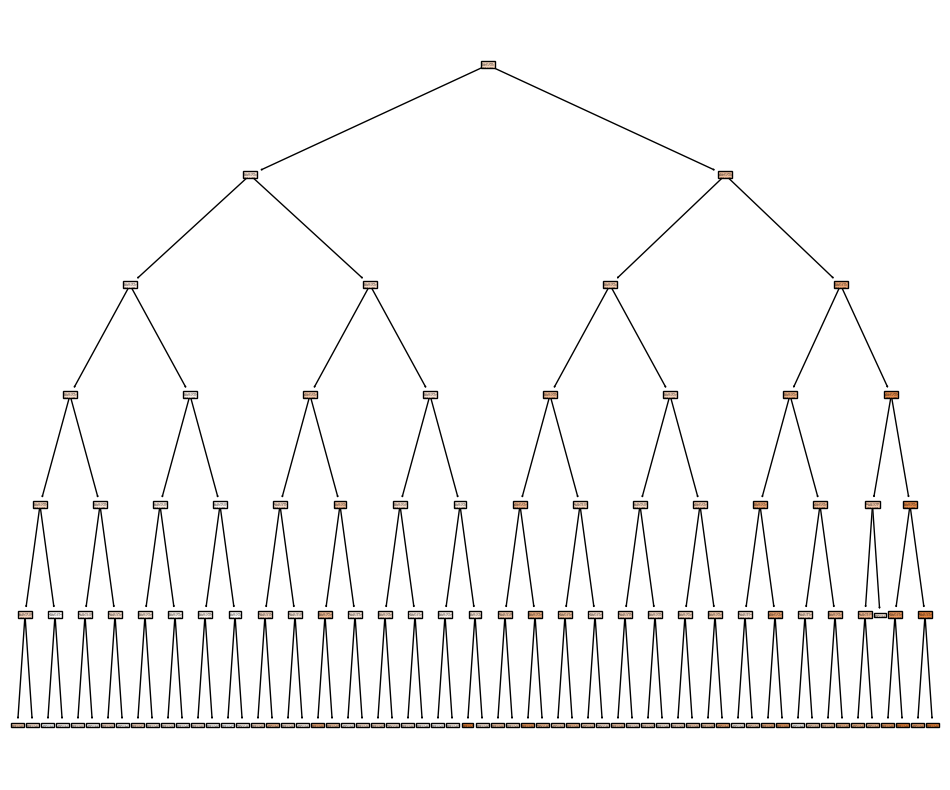

In [35]:
# display the decision tree
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(regressor,filled=True)  # filled : it will fill some colour into the nodes 

In [36]:
y_pred=regressorcv.predict(x_test)

In [37]:
# accuracy
r2_score(y_pred,y_test)

0.5176608209819615